In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

In [2]:
def get_images(df, folder_dir):
    im_name = df['test_name'].values[0]
    gt = os.path.join(folder_dir, im_name) + '_gt.png'
    pred = os.path.join(folder_dir, im_name) + '_pred.png'
    return imread(gt), imread(pred)

def show_images(im_gt, im_pred):
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(im_gt)
    axarr[1].imshow(im_pred)

In [3]:
folder_dir = '../test_model_deeplabv3/test_300_epochs_640x400_2263_images/'
df = pd.read_csv(os.path.join(folder_dir, 'test_scores.csv'), dtype={'test_name': str})
df.rename(columns= lambda x: x.strip(), inplace=True) # algunos nombres de columnas tenian espacios
df.head()

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
0,000000199487,0.992637,0.992747,0.992637,0.992675,0.951732,0.997844,0.941402,0.977298,0.965929
1,000000199488,0.992879,0.992944,0.992879,0.992901,0.951855,0.997303,0.948101,0.981280,0.959403
2,000000199489,0.993328,0.993282,0.993328,0.993248,0.950652,0.995261,0.984247,0.975994,0.986455
3,000000199490,0.993891,0.993930,0.993891,0.993904,0.959476,0.997882,0.951405,0.980041,0.985794
4,000000199491,0.994105,0.994086,0.994105,0.994055,0.957856,0.996134,0.984805,0.981722,0.961791


## Cantidad de imágenes evaluadas

In [4]:
df.shape[0]

2263

# mIoU

In [5]:
df['mean iou'].mean()

0.9257385797613787

# Min IoU

In [6]:
df[df['mean iou'] == df['mean iou'].min()]

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
1578,000000240750,0.922195,0.910011,0.922195,0.915227,0.299028,0.959824,0.329532,0.121243,0.126984


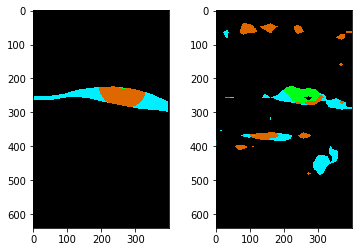

In [7]:
min_iou = df[df['mean iou'] == df['mean iou'].min()]
im_gt, im_pred = get_images(min_iou, folder_dir)
show_images(im_gt, im_pred)

# Max IoU

In [8]:
df[df['mean iou'] == df['mean iou'].max()]

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
287,000000207710,0.993699,0.993764,0.993699,0.993719,0.970746,0.997962,0.965974,0.992587,0.972393


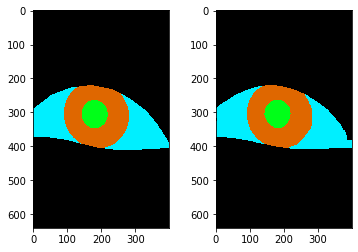

In [9]:
max_iou = df[df['mean iou'] == df['mean iou'].max()]
im_gt, im_pred = get_images(max_iou, folder_dir)
show_images(im_gt, im_pred)

# IoU $ \ge $ 0.50

In [10]:
print(f"Cantidad de imagenes con IoU > 0.50: {df[df['mean iou'] > .5].shape[0]}")

Cantidad de imagenes con IoU > 0.50: 2255


# IoU $ \ge $ 0.75

In [11]:
print(f"Cantidad de imagenes con IoU > 0.75: {df[df['mean iou'] > .75].shape[0]}")

Cantidad de imagenes con IoU > 0.75: 2176


# IoU $ \ge $ 0.90

In [12]:
print(f"Cantidad de imagenes con IoU > 0.90: {df[df['mean iou'] > .9].shape[0]}")

Cantidad de imagenes con IoU > 0.90: 2026


# IoU $ \ge $ 0.95

In [13]:
print(f"Cantidad de imagenes con IoU > 0.95: {df[df['mean iou'] > .95].shape[0]}")

Cantidad de imagenes con IoU > 0.95: 863
